In [1]:
import sys, os
import yaml
from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from xbout import open_boutdataset


# This comes from https://github.com/mikekryjak/sdtools
sys.path.append(os.path.join(r"C:\Users\Mike\OneDrive\Project\python-packages\sdtools"))
from hermes3.grid_fields import *

# This is notebook stuff, it auto re-imports packages 
# %matplotlib qt
%load_ext autoreload
%autoreload 2

# Grid generation

Assume grid and input file have the same name

# I/O
Read settings file and equilibrium

In [7]:
gridname = "test_orthogonal_ultralowres_8sol_nx4"
path = os.path.join(r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\Hypnotoad_tests")
path_yaml = os.path.join(path, f"{gridname}.yml")
path_grid = os.path.join(path, f"{gridname}.nc")  # This is for the grid we generate and want to save somewhere
path_eq = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid\Hypnotoad_tests\test_connected-double-null.eqdsk"
    


# Plotting equilibrium and wall

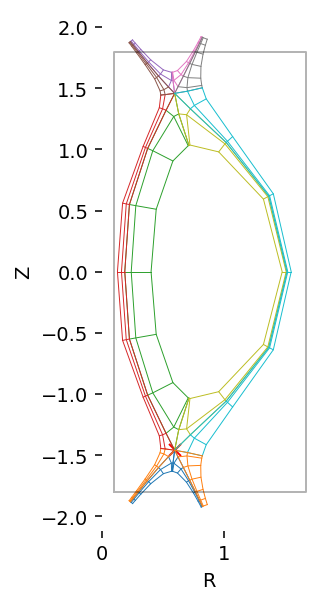

In [8]:
def plot(loc):
    
    fig, ax = plt.subplots(dpi = 140)
    ax.plot(*eq.x_points[0], "rx",)
    # mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
    mesh.plotGridCellEdges(ax = ax, lw = 0.5)
    eq.plotWall(axis = ax, linewidth = 1, alpha = 0.3)
    ax.grid(False)
    ax.legend('', frameon=False)
    
    ax.set_xlabel("R")
    ax.set_ylabel("Z")
    ax.set_aspect(1)
    
    
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    
    # ax.xaxis.label.set_visible(False)
    # ax.yaxis.label.set_visible(False)
    
    ax.set_frame_on(False)
    
    if loc == "lower":
        ax.set_xlim([0, None]); ax.set_ylim([None,None])     # Both lower divertors
    elif loc == "lower_zoom":
        ax.set_xlim([0.25, 0.6]); ax.set_ylim([-0.9,-0.7])     # Both lower divertors zoom
    elif loc == "inner_upper":
        ax.set_xlim([0.20, 0.45]); ax.set_ylim([0.6,0.8])     # Inner upper leg
    elif loc == "omp":
        ax.set_xlim([0.62, 0.800]); ax.set_ylim([-0.08,0])     # OMP
    elif loc == "imp":
        ax.set_xlim([0.12, 0.300]); ax.set_ylim([-0.15,0.05])     # IMP
    else:
        raise ValueError("Invalid location")
    
    ## PLOT REFERENCE
    # mesh2 = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3e2-lores_widev2.nc")
    # kwargs = dict(s= 10, zorder = 20, c = "k")
    # slicer = mesh2.slices("core_edge")
    # ax.scatter(mesh2.mesh["Rxy"][slicer].flatten(), mesh2.mesh["Zxy"][slicer].flatten(), label = "Reference", **kwargs)
    # slicer = mesh2.slices("sol_edge")
    # ax.scatter(mesh2.mesh["Rxy"][slicer].flatten(), mesh2.mesh["Zxy"][slicer].flatten(), **kwargs)
    # mesh2.close()
    
    plt.savefig(os.path.join(path, gridname + ".png"), dpi = 400, bbox_inches = "tight")
plot("lower") 

## Generate grid

In [9]:
# Outer sol 4->6 Nope
# All to 10-> OK
# Reduce nx to 2,2 -> ok
# Reduce divertor to 5,5 -> ok
# Reduce divertor to 4,4 -> ok
# Reduce SOL to 8,8 -> 

  nx = 65, ny = 65

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  5e-16                      
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  1.0                        
finecontour_maxits                                |  1000                       
finecontour_overdamping_factor                    |  0.8             (default)  
leg_refine_atol                                   |  2e-16                      
leg_refine_maxits                                 |  10000                      
leg_trace_atol                                    |  5e-17           (default)  


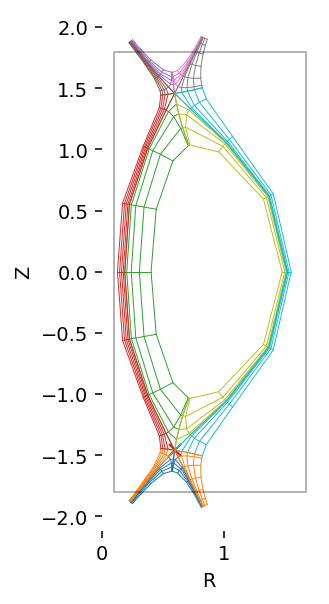

In [10]:
# Read options
with open(path_yaml) as f:
	options = yaml.safe_load(f)
 
# Read geqdsk
with open(path_eq) as fh:
    eq = tokamak.read_geqdsk(fh, settings=options, nonorthogonal_settings=options)

mesh = BoutMesh(eq, options)
mesh.calculateRZ()
plot("lower")

mesh.geometry()
mesh.writeGridfile(path_grid)

Plot grid

(-2.0, -0.8)

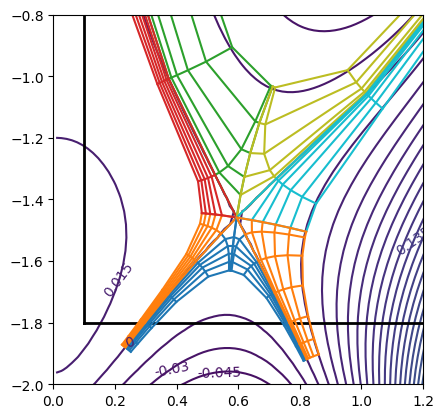

In [27]:
fig, ax = plt.subplots()
eq.plotPotential(axis = ax, ncontours = 100)
# eq.plotSeparatrix(axis = ax)
eq.plotWall(axis = ax)
mesh.plotGridCellEdges(ax = ax)
ax.set_aspect("equal")

# Both lower divertors
plt.xlim([0, 1.2])
plt.ylim([-2.0,-0.8])  

# Save

In [20]:
mesh.geometry()
mesh.writeGridfile(path_grid)

Calculate geometry
Distances inner_lower_divertor(0)
Distances inner_lower_divertor(1)
Distances inner_core(0)tances: 5


SolutionError: refinePoint failed to converge with methods: ['line']